# Rental Property Performance Analyzer (Python + Pandas)

This notebook analyzes rental income/expenses, computes cashflow & investment metrics, and summarizes operational insights for decision-making.


## Business Questions
1. What is monthly net cashflow and how volatile is it?
2. What are the biggest expense drivers?
3. What is the property’s NOI and estimated cap rate?
4. What does a simple 12-month forecast suggest?


## Data
Starter CSV templates (income, expenses, assumptions) designed to be swappable with real-world bank/PM statements later.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)


In [10]:
income = pd.read_csv("C:\\Users\\babak\\real-estate-analyzer\\data\\starter\\income.csv", parse_dates = ['date'])
expenses = pd.read_csv("C:\\Users\\babak\\real-estate-analyzer\\data\\starter\\expenses.csv", parse_dates=['date'])
assumptions = pd.read_csv("C:\\Users\\babak\\real-estate-analyzer\\data\\starter\\assumptions.csv")
units = pd.read_csv("C:\\Users\\babak\\real-estate-analyzer\\data\\starter\\units.csv")

In [11]:
income.head()

,date,property,unit,category,amount
0,2023-01-01,MapleRidgeHouse,Main,rent,3200
1,2023-02-01,MapleRidgeHouse,Main,rent,3200
2,2023-03-01,MapleRidgeHouse,Main,rent,3200
3,2023-01-01,MapleRidgeHouse,Basement,rent,1600
4,2023-02-01,MapleRidgeHouse,Basement,rent,1600


In [12]:
expenses.head()

,date,property,category,amount
0,2023-01-05,MapleRidgeHouse,utilities,420
1,2023-02-05,MapleRidgeHouse,utilities,390
2,2023-03-05,MapleRidgeHouse,utilities,450
3,2023-01-10,MapleRidgeHouse,insurance,180
4,2023-02-10,MapleRidgeHouse,insurance,180


In [13]:
assumptions.head()

,property,property_value,loan_balance,interest_rate,annual_rent_increase,vacancy_rate
0,MapleRidgeHouse,1250000,720000,0.052,0.02,0.05


In [14]:
units.head()

,property,unit,bedrooms,bathrooms,sqft,monthly_rent,occupied
0,MapleRidgeHouse,Main,3,2,1600,3200,True
1,MapleRidgeHouse,Basement,2,1,800,1600,True


In [15]:
income['date'] = pd.to_datetime(income['date'])

In [16]:
income['date'] = pd.to_datetime(income['date'])

In [17]:
income['month'] = income['date'].dt.to_period('M')
expenses['month'] = expenses['date'].dt.to_period('M')

In [18]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      9 non-null      datetime64[ns]
 1   property  9 non-null      object        
 2   unit      9 non-null      object        
 3   category  9 non-null      object        
 4   amount    9 non-null      int64         
 5   month     9 non-null      period[M]     
dtypes: datetime64[ns](1), int64(1), object(3), period[M](1)
memory usage: 564.0+ bytes


In [19]:
income.head()

,date,property,unit,category,amount,month
0,2023-01-01,MapleRidgeHouse,Main,rent,3200,2023-01
1,2023-02-01,MapleRidgeHouse,Main,rent,3200,2023-02
2,2023-03-01,MapleRidgeHouse,Main,rent,3200,2023-03
3,2023-01-01,MapleRidgeHouse,Basement,rent,1600,2023-01
4,2023-02-01,MapleRidgeHouse,Basement,rent,1600,2023-02


In [20]:
monthly_income = (
    income
    .groupby('month')['amount']
    .sum()
    .reset_index(name='total_income')
)


In [21]:
monthly_income

,month,total_income
0,2023-01,4850
1,2023-02,4845
2,2023-03,4855


In [22]:
monthly_expenses = (
    expenses
    .groupby('month')['amount']
    .sum()
    .reset_index(name='total_expenses')
)

In [23]:
monthly_expenses

,month,total_expenses
0,2023-01,910
1,2023-02,1730
2,2023-03,1160


In [24]:
cashflow = pd.merge(
    monthly_income,
    monthly_expenses,
    on='month',
    how='outer'
)
cashflow['net_cashflow'] = (
    cashflow['total_income'] - cashflow['total_expenses']
)

In [25]:
cashflow.head()

,month,total_income,total_expenses,net_cashflow
0,2023-01,4850,910,3940
1,2023-02,4845,1730,3115
2,2023-03,4855,1160,3695


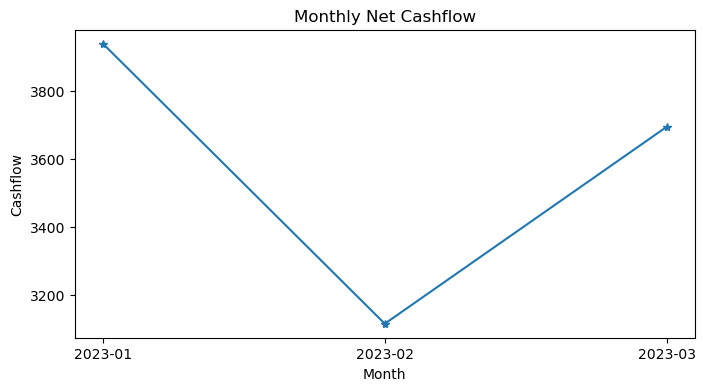

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(cashflow['month'].astype(str), cashflow['net_cashflow'], marker = '*')
plt.title('Monthly Net Cashflow')
plt.xlabel('Month')
plt.ylabel('Cashflow')
plt.grid(False)
plt.show()

In [27]:
expenses.head()

,date,property,category,amount,month
0,2023-01-05,MapleRidgeHouse,utilities,420,2023-01
1,2023-02-05,MapleRidgeHouse,utilities,390,2023-02
2,2023-03-05,MapleRidgeHouse,utilities,450,2023-03
3,2023-01-10,MapleRidgeHouse,insurance,180,2023-01
4,2023-02-10,MapleRidgeHouse,insurance,180,2023-02


In [28]:
expense_breakdown = (
    expenses
    .groupby('category')['amount']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)
expense_breakdown

,category,amount
0,utilities,1260
1,property_tax,930
2,repairs,850
3,insurance,540
4,maintenance,220


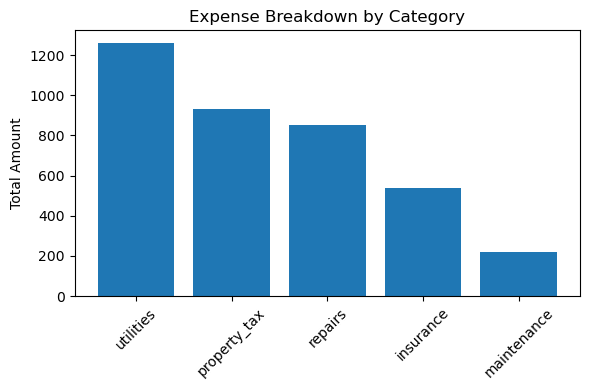

In [29]:
plt.figure(figsize=(6, 4))
plt.bar(expense_breakdown['category'], expense_breakdown['amount'])
plt.title('Expense Breakdown by Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
monthly_expense_by_category = (
    expenses
    .groupby(['month', 'category'])['amount']
    .sum()
    .reset_index()
)
monthly_expense_by_category

,month,category,amount
0,2023-01,insurance,180
1,2023-01,property_tax,310
2,2023-01,utilities,420
3,2023-02,insurance,180
4,2023-02,property_tax,310
5,2023-02,repairs,850
6,2023-02,utilities,390
7,2023-03,insurance,180
8,2023-03,maintenance,220
9,2023-03,property_tax,310


In [31]:
cashflow = cashflow.sort_values('month')
cashflow['rolling_3m_avg'] = (
    cashflow['net_cashflow']
    .rolling(window=3)
    .mean()
)
cashflow

,month,total_income,total_expenses,net_cashflow,rolling_3m_avg
0,2023-01,4850,910,3940,NaN
1,2023-02,4845,1730,3115,NaN
2,2023-03,4855,1160,3695,3583.333333


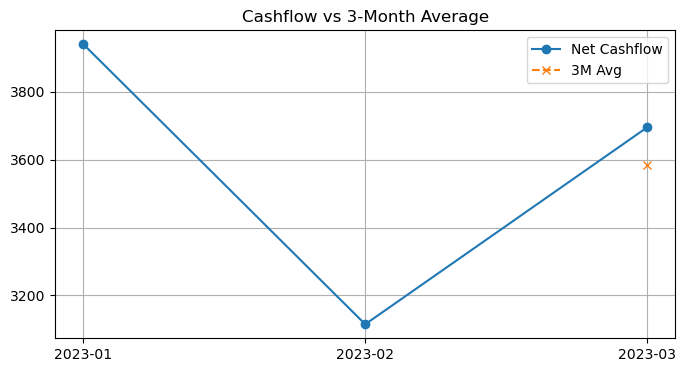

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(cashflow['month'].astype(str), cashflow['net_cashflow'], marker='o', label='Net Cashflow')
plt.plot(cashflow['month'].astype(str), cashflow['rolling_3m_avg'], marker = 'x', linestyle='--', label='3M Avg')
plt.legend()
plt.title('Cashflow vs 3-Month Average')
plt.grid(True)
plt.show()

## Key Insights
- Largest expense driver is utilites
- One-off repair February 2023 significantly reduced cashflow
- Rolling average smooths volatility and shows underlying trend
  

In [33]:
operating_expense_categories = [
    'utilities',
    'insurance',
    'property_tax',
    'maintenance',
    'repairs'
]

In [34]:
operating_expenses = expenses[expenses['category'].isin(operating_expense_categories) ]


In [35]:
monthly_operating_expenses = (
    operating_expenses
    .groupby('month')['amount']
    .sum()
    .reset_index(name='operating_expenses')
)

In [36]:
noi_df = pd.merge(
    monthly_income,
    monthly_operating_expenses,
    on = 'month',
    how = 'left'
)

noi_df['NOI'] = noi_df['total_income'] - noi_df['operating_expenses']
noi_df

,month,total_income,operating_expenses,NOI
0,2023-01,4850,910,3940
1,2023-02,4845,1730,3115
2,2023-03,4855,1160,3695


In [37]:
annual_noi = noi_df['NOI'].sum()
annual_noi

10750

In [38]:
assumptions

,property,property_value,loan_balance,interest_rate,annual_rent_increase,vacancy_rate
0,MapleRidgeHouse,1250000,720000,0.052,0.02,0.05


In [39]:
property_value = assumptions.loc[0, 'property_value']

In [40]:
property_value

1250000

In [41]:
cap_rate = annual_noi / property_value
cap_rate

0.0086

In [42]:
print(f"Cap Rate: {cap_rate:.2%}")

Cap Rate: 0.86%


In [43]:
interest_rate = assumptions.loc[0, 'interest_rate']
loan_balance = assumptions.loc[0, 'loan_balance']
annual_interest = loan_balance * interest_rate

In [44]:
annual_cashflow = annual_noi - annual_interest

In [45]:
down_payment = property_value - loan_balance

In [46]:
coc_return = annual_cashflow / down_payment
print(f"Cash-on-Cash Return: {coc_return:.2%}")


Cash-on-Cash Return: -5.04%


In [47]:
last_avg = cashflow['rolling_3m_avg'].iloc[-1]

forecast_months = 12

forecast = [last_avg] * forecast_months



In [48]:
future_months = pd.period_range(
    start=cashflow['month'].iloc[-1] + 1,
    periods=forecast_months,
    freq='M'
)

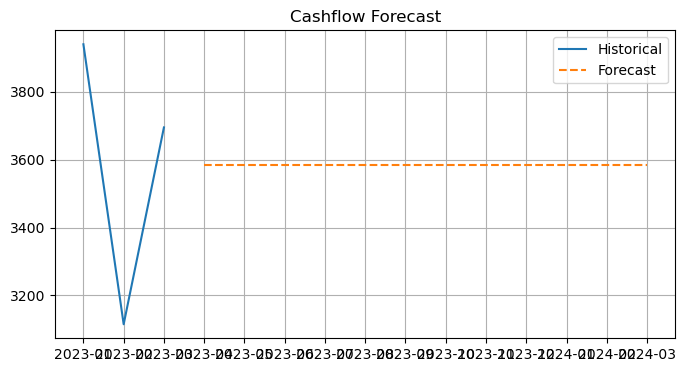

In [49]:
plt.figure(figsize=(8,4))
plt.plot(cashflow['month'].astype(str), cashflow['net_cashflow'], label='Historical')
plt.plot(future_months.astype(str), forecast, linestyle='--', label='Forecast')
plt.legend()
plt.title('Cashflow Forecast')
plt.grid(True)
plt.show()

## Investment Summary

- Annual NOI:
- Caprate:
- Cash-on-Cash Return:
- Largest risk factor: expense volatility from repairs
- Forecast indicates stable/declining/improving cashflow
- 

## Limitations & Next Steps
- Starter data is synthetic; logic is designed to swap in real bank/PM exports.
- Debt service is simplified (interest-only approximation). Next iteration will use amortization schedule.
- Future work: integrate real market data (Zillow/FHFA), add scenario testing (vacancy, rent growth), and deploy a lightweight dashboard.


In [50]:
import os
os.getcwd()

'C:\\Users\\babak\\real-estate-analyzer\\notebooks'